# Project, Investigate a Dataset: FBI Gun Data and the U.S. Census 

## Table of Contents

#### Introduction 

#### Data Wrangling 

#### Exploratory Data Analysis

#### Question(s) / Analysis 

#### Conclusions

#### Data Analysis Limitations

In [2]:
# Preliminary steps required to set-up the gun_data analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

% matplotlib inline

#### Begin the preliminary process of exploring (U.S.) gun data information

## Research Questions: 

#### 1). Is there a connection between increased (state-based) background checks and overall (state-based) gun sales?
#### 2). Is there a connection between increased gun-registration and ethnic background? 
#### 3). Is there a connection between the season of the year and gun purchases? 

In [3]:
# Begin process of conducting a general inquiry in order to get familiar with the gun_data set
df_gun = pd.read_csv ('gun_data.csv')

df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


Returns the first five rows and a total of 27 columns in this dataframe 

In [4]:
# Request a tuple to further assess the dimensions of this dataframe
df_gun.shape

(12485, 27)

In [6]:
# Check the datatypes in order to determine if further conversion is required, e.g., looking for strings
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [7]:
# Inquire into the number of unique values in each column
df_gun.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [8]:
# Display useful descriptive statistics, eg., mean, mode, median, etc. for each column of gun_data
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


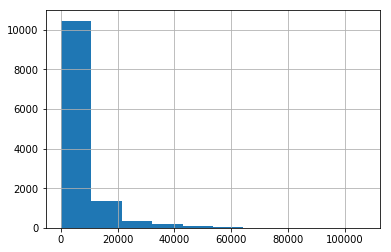

In [9]:
# Display some preliminary results in bar-charts to get a better sense if/how the data might be skewed
df_gun.handgun.hist();

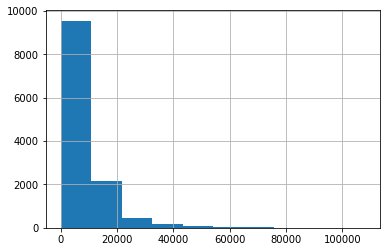

In [10]:
# Display some preliminary results in bar-charts to get a better sense if/how the data might be skewed
df_gun.long_gun.hist();

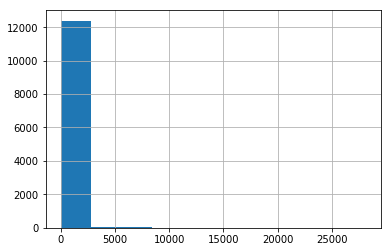

In [11]:
# Display some preliminary results in bar-charts to get a better sense if/how the data might be skewed
df_gun.admin.hist();

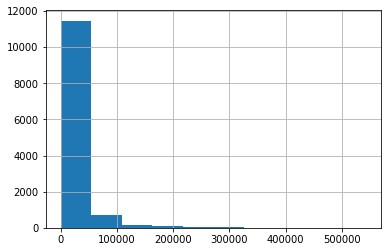

In [12]:
# Display some preliminary results in bar-charts to get a better sense if/how the data might be skewed
df_gun.totals.hist();

In [13]:
# Display all the index numbers and column labels to further understand the categories of data recorded 
for i, v in enumerate(df_gun.columns):
    print(i, v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


In [14]:
# Begin the process of determining datatype(s), e.g., to futher determine what data might require conversion
type(df_gun['month'][0])

str

In [15]:
# Continue the process of determining what data might be deleted/omitted from this analysis 
df_gun.count()

month                        12485
state                        12485
permit                       12461
permit_recheck                1100
handgun                      12465
long_gun                     12466
other                         5500
multiple                     12485
admin                        12462
prepawn_handgun              10542
prepawn_long_gun             10540
prepawn_other                 5115
redemption_handgun           10545
redemption_long_gun          10544
redemption_other              5115
returned_handgun              2200
returned_long_gun             2145
returned_other                1815
rentals_handgun                990
rentals_long_gun               825
private_sale_handgun          2750
private_sale_long_gun         2750
private_sale_other            2750
return_to_seller_handgun      2475
return_to_seller_long_gun     2750
return_to_seller_other        2255
totals                       12485
dtype: int64

###### Based on the aforementioned output, the 'month' and 'state' provide the most complete information thereby making these two columns the best-suited for conducting further data analysis.

In [16]:
# Display the total states / gun indices to determine if more than 50 states were included
index_gun_state = df_gun.groupby('state').sum().index
index_gun_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [17]:
# Display the total states / gun counts to determine if more than 50 states were included
len(index_gun_state)

55

#### Begin the preliminary process of exploring general (U.S.) census data information

In [18]:
# Preliminary steps required to set-up the census_data analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

% matplotlib inline

In [19]:
# Begin process of conducting a general inquiry in order to get familiar with the gun_data set
df_census = pd.read_csv('census_data.csv')

df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Returns the first five rows and a total of 52 columns in this dataframe 

In [20]:
# Request a tuple to further assess the dimensions of this dataframe
df_census.shape

(85, 52)

In [21]:
# Continue the process of determining what data might be deleted/omitted from this analysis 
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [22]:
# Display useful descriptive statistics, eg., mean, mode, median, etc. for each column of census_data
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"American Indian and Alaska Native alone, perce...",(c),"$24,091",7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,0.686,0.048,50.40%,2.50%,"625,741",202.6,"182,913",1.50%,1.90%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [23]:
# Select 'California' / 19 random districts/states/territories to assess datatype
type(df_census['California'][20]) 

str

In [24]:
# Display the total states / census indices to determine if more than 50 states were included
index_census_state = df_census.iloc[0].index
index_census_state

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [25]:
# Omit the first two indices, 'Fact' and 'Fact Note' to reduce the count to 50 thereby matching the gun_data set
index_census_state = index_census_state[2:]
index_census_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [26]:
# Confirm 'Fact' and 'Fact Note' indices were removed 
len(index_census_state)

50

## Data Wrangling

##### 1) Remove extra rows/columns (District of Columbia; Guam; Mariana Islands; Puerto Rico; Virgin Islands) - code line 37
##### 2) Check for NaN values - code line 53 
##### 3) Remove NaN values - code line 54 
##### 4) Check for outliers - code line 66
##### 5) Display these outliers graphically - code line 67 
##### 6) Refine and display this result graphically - code line 68
##### 7) Further refine and display this result graphically - code line 69

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Is there a connection between increased (state-based) background checks and overall (state-based) gun sales?

In [27]:
# Return state-based information
gun_state = df_gun.groupby('state')

In [28]:
gun_state_sum = gun_state.sum()

In [29]:
s_gun_state_totals = gun_state_sum['totals'] # s_ represents Pandas functionality

In [30]:
s_gun_state_totals.head()

state
Alabama        6706079
Alaska         1137643
Arizona        4425714
Arkansas       3752633
California    19014063
Name: totals, dtype: int64

###### Based on the 'month' and 'state' having the most complete information, the monthly data for each state will be grouped/summed while the totals column will be utilized based upon total number of background checks. 

###### The census_data(frame) has to be transposed to match-up with the gun_data

In [31]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [32]:
df_census_t = df_census.T

In [33]:
df_census_t.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Display an overview of the census data and numeric output as a precursor for further analysis
dict_census_vars = {}
for i in range(64): 
    dict_census_vars[i] = df_census['Fact'][i]
    print(i, df_census['Fact'][i])

0 Population estimates, July 1, 2016,  (V2016)
1 Population estimates base, April 1, 2010,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 Persons under 5 years, percent, April 1, 2010
6 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 Persons under 18 years, percent, April 1, 2010
8 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 Persons 65 years and over, percent, April 1, 2010
10 Female persons, percent,  July 1, 2016,  (V2016)
11 Female persons, percent, April 1, 2010
12 White alone, percent, July 1, 2016,  (V2016)
13 Black or African American alone, percent, July 1, 2016,  (V2016)
14 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 Asian alone, percent, July 1, 2016,  (V2016)
16 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
17 Two or More Races, percent, 

In [35]:
# Remove 'state' as it will not be used for further analysis
del s_gun_state_totals.index.name

In [36]:
# Sort out the required Data Wrangling regarding district(s) and territories, etc. to reduce the count to 50  
for s in s_gun_state_totals.index:
    if s not in df_census_t.index:
        print(s)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


In [37]:
# Drop these five locations from the DataFrame
s_gun_state_totals = s_gun_state_totals.drop([
'District of Columbia',
'Guam',
'Mariana Islands',
'Puerto Rico',
'Virgin Islands'])

In [38]:
# Parse string percentage data with '%' symbol
def parse_str_percent(string_percent):
    return float(string_percent.strip('%'))/100

###### Calculate Pearson's correlation for all numerical variables in census data, to determine which (if any) variable has the highest-correlation with gun sales/background checks

In [39]:
# Correlation coefficients - (measurement) statistics to determine the straight-line relationship and strength 
# between two variables

def correlation(x, y):
    '''
    Pearson's Correlation Coefficient Formula:
    
    correlation = average of (x in standard units) multiplied by (y in standard units)
    
    Remember: Pass argument "ddof=0" to Pandas std() function!
    '''
    x_std = x.std(ddof=0)
    y_std = y.std(ddof=0)
    x_mean = x.mean()
    y_mean = y.mean()
    correlation = (((x - x_mean)/x_std) * ((y - y_mean)/y_std)).mean()
    return correlation

In [40]:
# get_correlation method to parse various numeric-like strings into numerics and return correlation coefficient
def get_correlation(s_gun_state_totals, column_num):
    '''
    Parse numeric-like string data; calculate correlation coefficient
    (column_num parameter takes column names from df_census_t)
    '''
    series_x = df_census_t[column_num][2:]
    #print(type(series_x[0]))
    for i in range(len(series_x)):
        series_x[i] = series_x[i].replace('$','')
        if (series_x[i][-1]=='%'):
            series_x[i]=parse_str_percent(series_x[i])
        elif (series_x[i][-1]!='%'):
            try:
                series_x[i]=int(series_x[i].replace(',',''))
            except ValueError:
                try:
                    series_x[i]=float(series_x[i].replace(',',''))
                except ValueError:
                    series_x[i]=np.nan
    series_x.fillna(series_x.mean(), inplace=True)
    return correlation(s_gun_state_totals, series_x)

###### For all numeric census data variables, calculate correlation coefficients with each state's 'totals' gun data 

In [41]:
corrcoefs = {}
# Iterate all columns
for i in range(64): 
    corrcoef = get_correlation(s_gun_state_totals,i)
    corrcoefs[i] = corrcoef
# Print column indices; corrcoef; variable name
    print(i, round(corrcoef, 5), dict_census_vars[i])

0 0.6497 Population estimates, July 1, 2016,  (V2016)
1 0.64958 Population estimates base, April 1, 2010,  (V2016)
2 0.03633 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 0.64958 Population, Census, April 1, 2010
4 0.05601 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 0.06406 Persons under 5 years, percent, April 1, 2010
6 0.1098 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 0.13616 Persons under 18 years, percent, April 1, 2010
8 -0.16944 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 -0.1359 Persons 65 years and over, percent, April 1, 2010
10 0.16916 Female persons, percent,  July 1, 2016,  (V2016)
11 0.1531 Female persons, percent, April 1, 2010
12 0.01166 White alone, percent, July 1, 2016,  (V2016)
13 0.14433 Black or African American alone, percent, July 1, 2016,  (V2016)
14 -0.22843 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 -0.02228 Asian alone, percent, July 1, 201

In [42]:
# Reverse-order sort, by value dict of correlation coefficient
sorted_corrcoefs = sorted(corrcoefs, key=corrcoefs.get, reverse=True)

In [43]:
# Print the sorted list
for each in sorted_corrcoefs:
    print(str(each) + ',', end='',flush=True)

42,20,30,22,23,60,0,1,3,59,44,51,43,50,54,55,56,61,41,57,52,29,40,58,49,53,46,18,33,21,10,31,11,36,13,7,6,37,63,5,4,2,32,12,15,28,62,26,24,9,19,16,25,17,35,8,27,48,47,14,38,45,39,34,

In [44]:
# Print the sorted Positive and Negative Correlation indices
print(sorted_corrcoefs[:20])
print(sorted_corrcoefs[54:])

[42, 20, 30, 22, 23, 60, 0, 1, 3, 59, 44, 51, 43, 50, 54, 55, 56, 61, 41, 57]
[35, 8, 27, 48, 47, 14, 38, 45, 39, 34]


In [45]:
# Put all variable names into a dict
variables = {}
for i in range(64): 
    variables[i]=df_census['Fact'][i]

In [46]:
# Display the Top Five Positive and Top Five Negative data correlations
print('Top Five Positive Correlations:')
for each in sorted_corrcoefs[:5]:
    print('   ' + str(each) + ': ' + str(round(corrcoefs[each],5)) + ' '+ variables[each])
print('Top Five Negative Correlations:')
for each in sorted_corrcoefs[54:][::-2]:
    print('   ' + str(each) + ': ' + str(round(corrcoefs[each],5)) + ' '+ variables[each])

Top Five Positive Correlations:
   42: 0.67445 Total manufacturers shipments, 2012 ($1,000)
   20: 0.67324 Veterans, 2011-2015
   30: 0.65733 Households, 2011-2015
   22: 0.65725 Housing units,  July 1, 2016,  (V2016)
   23: 0.65546 Housing units, April 1, 2010
Top Five Negative Correlations:
   34: -0.47596 High school graduate or higher, percent of persons age 25 years+, 2011-2015
   45: -0.29366 Total retail sales per capita, 2012
   14: -0.22843 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
   48: -0.19028 Per capita income in past 12 months (in 2015 dollars), 2011-2015
   8: -0.16944 Persons 65 years and over, percent,  July 1, 2016,  (V2016)


In [47]:
# Concetenate the two Series, based upon the most significant Positive Correlation: (42) 0.67445 TM Shipments
result = pd.concat([df_census_t[42], s_gun_state_totals], axis=1, ignore_index=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


###### The Top Three Positive Correlations are more significant than the Top Three Negative Correlations 

###### Note: While correlation, e.g., x = action CAN be linked to y = occurrence it does not prove a direct, cause-and-effect interrelationship. Conversely, causation, e.g., x = action produces a predictable, e.g., y = occurrence (with a clear relationship).

## Data Visualizations

In [48]:
result.head()

,42,totals
Alabama,124809759,6706079.0
Alaska,1.1883e+08,1137643.0
Arizona,51243473,4425714.0
Arkansas,62712925,3752633.0
California,512303164,19014063.0


In [49]:
result.columns

Index([42, 'totals'], dtype='object')

In [50]:
# Standardize 42, the first column name as it looks to not be a string
result.columns = ['42','totals']
result.columns

Index(['42', 'totals'], dtype='object')

In [51]:
result.head()

,42,totals
Alabama,124809759,6706079.0
Alaska,1.1883e+08,1137643.0
Arizona,51243473,4425714.0
Arkansas,62712925,3752633.0
California,512303164,19014063.0


In [52]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 2 columns):
42        52 non-null object
totals    50 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [53]:
result

,42,totals
Alabama,124809759,6706079.0
Alaska,1.1883e+08,1137643.0
Arizona,51243473,4425714.0
Arkansas,62712925,3752633.0
California,512303164,19014063.0
Colorado,50447098,6058482.0
Connecticut,55160095,3168126.0
Delaware,22597384,491369.0
Fact,"Total manufacturers shipments, 2012 ($1,000)",NaN
Fact Note,(c),NaN


###### There are two additional rows with NaN-values which will now be dropped

In [54]:
# Remove NaN-values from this DataFrame
result.drop(['Fact','Fact Note'], inplace=True)

In [49]:
result

,42,totals
Alabama,124809759,6706079.0
Alaska,1.1883e+08,1137643.0
Arizona,51243473,4425714.0
Arkansas,62712925,3752633.0
California,512303164,19014063.0
Colorado,50447098,6058482.0
Connecticut,55160095,3168126.0
Delaware,22597384,491369.0
Florida,96924106,11695777.0
Georgia,155836792,7209942.0


In [55]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
42        50 non-null object
totals    50 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


###### For futher analysis, an additional step is required to convert column '42' to numerics

In [56]:
result['42'] = pd.to_numeric(result['42'])

In [57]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 2 columns):
42        50 non-null float64
totals    50 non-null float64
dtypes: float64(2)
memory usage: 1.2+ KB


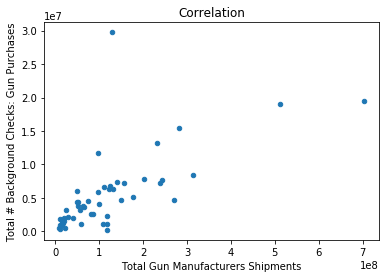

In [58]:
# Preliminary scatterplot data-visualization via Pandas.plot
ax = result.plot.scatter(x='42', y='totals')
ax.set_title('Correlation')
ax.set_xlabel('Total Gun Manufacturers Shipments')
ax.set_ylabel('Total # Background Checks: Gun Purchases');

###### To the naked-eye, scatterplots present a challenge to make meaning of what the data depicts

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


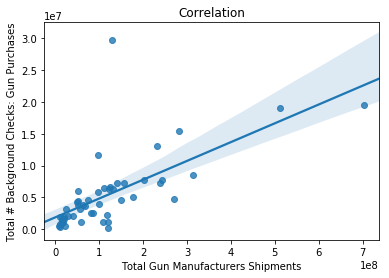

In [59]:
# For a better representation of data clarity, Seaborn visualization 
ax = sns.regplot(result['42'], result['totals'])
ax.set_title('Correlation')
ax.set_xlabel('Total Gun Manufacturers Shipments')
ax.set_ylabel('Total # Background Checks: Gun Purchases');

###### (Although the data displayed is exactly the same) this Seaborn graph presents a better image of how this data is interrelated

### Research Question 2: Is there a connection between increased gun-registration and ethnic background?

##### Overview of gun-registration based on ethnicity (ranked highest to lowest):

###### 18). 0.22636 Hispanic or Latino, percent, July 1, 2016, (V2016)
###### 13). 0.14433 Black or African American alone, percent, July 1, 2016, (V2016)
###### 12). 0.01166 White alone, percent, July 1, 2016, (V2016)
###### 14). -0.22843 American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)
###### 17). -0.16064 Two or More Races, percent, July 1, 2016, (V2016)
###### 16). -0.15151 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)
###### 19). -0.14671 White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)
###### 15). -0.02228 Asian alone, percent, July 1, 2016, (V2016)

###### There seems to be no strong correlation between gun-registration and ethnicity

### Research Question 3:  Is there a connection between the season of the year and gun purchases?

###### Group and sum-up states' total columns by month

In [60]:
all_df_gun_totals = df_gun[['month','totals']]

In [61]:
all_df_gun_totals.set_index('month',inplace=True)

In [62]:
all_df_gun_totals=all_df_gun_totals[::-1]

In [63]:
gun_totals_groupby_month = all_df_gun_totals.groupby('month').sum()

In [64]:
gun_totals_groupby_month.head()

,totals
month,
1998-11,21176
1998-12,870722
1999-01,585974
1999-02,690215
1999-03,741687


###### Seaborn Visualizations depicting the data graphically

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


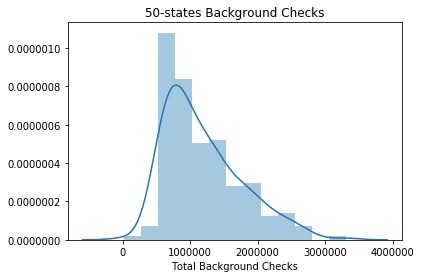

In [65]:
# Seaborn visualization 
ax = sns.distplot(gun_totals_groupby_month)
ax.set_title('50-states Background Checks')
ax.set_xlabel('Total Background Checks');

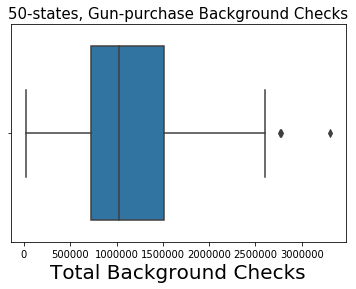

In [66]:
# Box and Whisker plot
ax = sns.boxplot(gun_totals_groupby_month)
ax.set_title('50-states, Gun-purchase Background Checks', fontsize=15)
ax.set_xlabel('Total Background Checks', fontsize=20);

###### Recheck the Box and Whisker Plot to determine if the outliers are such or if there is an undetected pattern therein

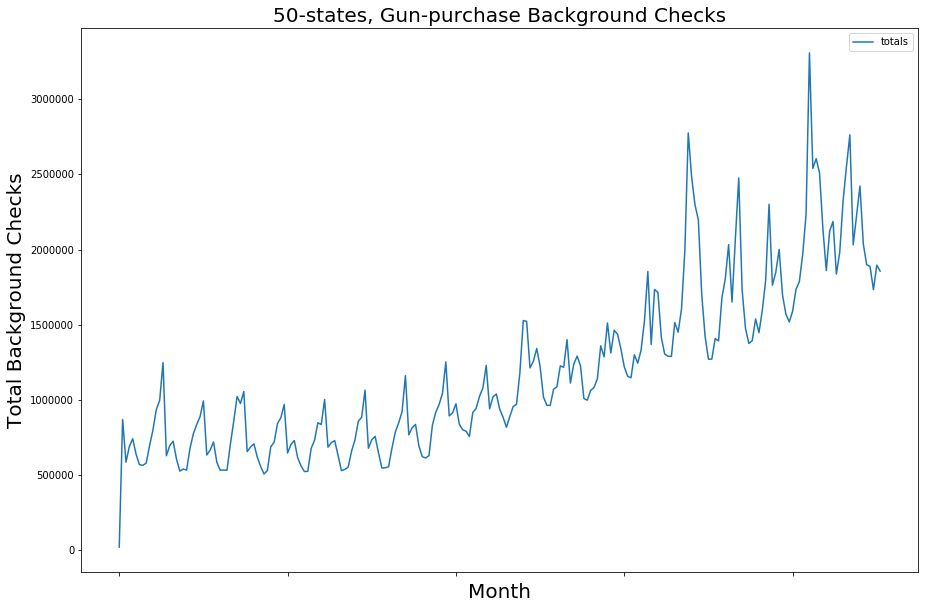

In [67]:
# Displaying the data graphically
ax = gun_totals_groupby_month.plot(figsize=(15,10))
ax.set_title('50-states, Gun-purchase Background Checks', fontsize=20)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Total Background Checks', fontsize=20);

###### While there is an upward trend, this graph is still a bit unclear if there is a seasonal pattern herein

###### For further review, the most complete data will be split into two sections from 1998-2008 / 2007-2016, January through December

[]

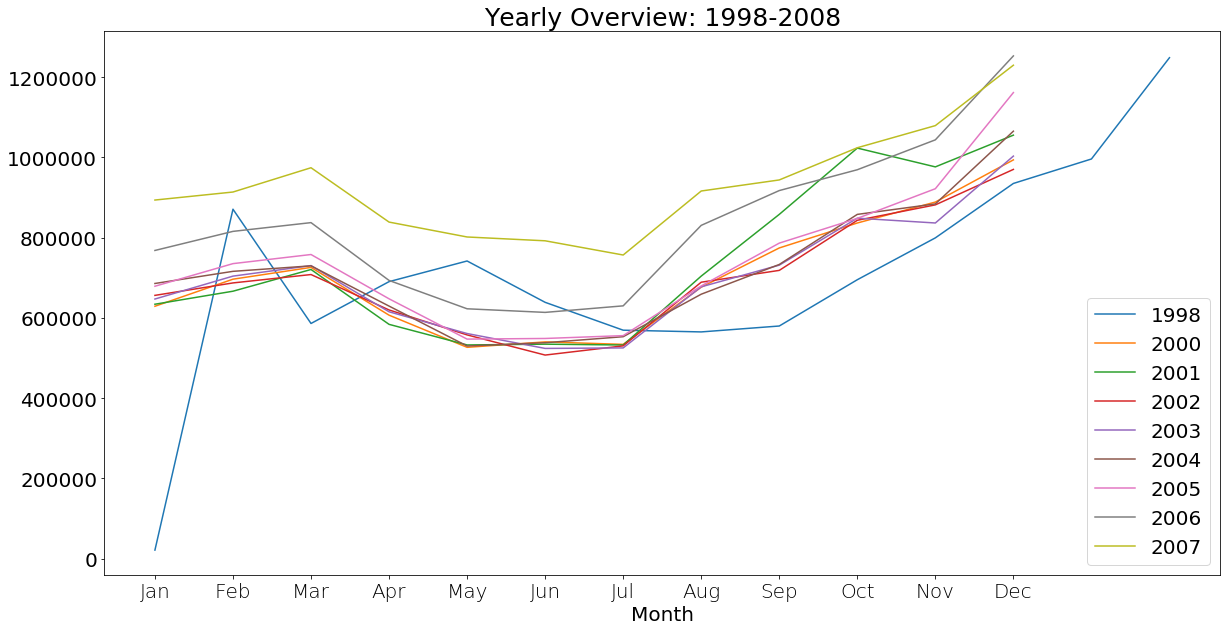

In [68]:
# Display the data graphically breaking it down separately by year
ax = gun_totals_groupby_month.loc['1998':'2000'].plot(figsize=(20,10),fontsize=20)
legend =['1998']
for i in range(2000,2008): #exclude incomplete years 
    ax = gun_totals_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),fontdict={
     'fontsize': 20,
     'fontweight': 20})
ax.set_title('Yearly Overview: 1998-2008', fontsize=25)
ax.set_xlabel('Month', fontsize=20)
ax.plot()

[]

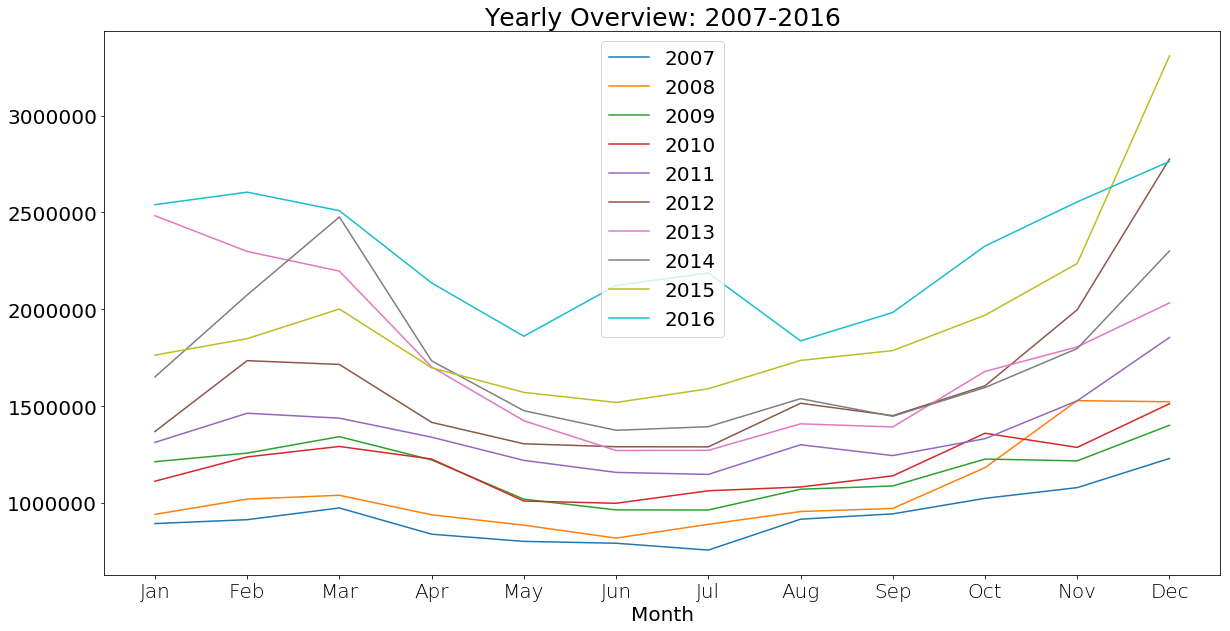

In [69]:
ax = gun_totals_groupby_month.loc['2007':'2008'].plot(figsize=(20,10),fontsize=20) 
legend =['2007']
for i in range(2008,2017): #exclude incomplete years 
    ax = gun_totals_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),fontdict={
     'fontsize': 20,
     'fontweight': 20})
ax.set_title('Yearly Overview: 2007-2016', fontsize=25)
ax.set_xlabel('Month', fontsize=20)
ax.plot()

###### Leaving 2016-aside, there is a sales increase beginning in the Fall through the Spring. This could be attributed to a) hunting season (which usually begins around October) and/or b) yearly-sales' cycles (where last year's inventory is on-sale). 

## Conclusions

##### 1) The ranking of Hispanics calls into question mass media generalizations regarding Black / African-American and gun-related violence
##### 2) Conversely, it would be worth examining why Asians / Asian-American have the lowest gun-registrations
##### 3) Given the positive correlation of Veterans and gun-ownership, it would also be worth examining what percentage are multi-gun owners
##### 4) What (if any) correlation exists between increased gun-sales and any given (horrific) mass-shooting?
##### 5) Finally, aside from hunting season or annual sales, are there any other unknown reasons for the increased Fall through Spring gun-sales?

## Data Analysis Limitations

##### 1) What is the impact of removing roughly .09% of the categories had on the overall results?   
###### (Removed: District of Columbia; Guam; Mariana Islands; Puerto Rico; Virgin Islands)
##### 2) Was all the data, e.g., Alaska and/or Hawaii accurately represented? 
##### 3) How does the increase in "Total (Gun) Manufacturers Shipments" impact overall gun sales?
##### 4) Does this increase in "Total (Gun) Manufacturers Shipments" correlate with the Fall through Spring uptick? 
##### 5) What percentage of gun-related registrations are new versus previous gun-owners making additional purchases?

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0